HW 2 of Computational Methods 540

1. (Monte Carlo Integration)

(a) Develop Matlab code to approximate the mean of a Beta(α, β) distribution with α = 3 and β = 4 using Monte Carlo integration. You can compare your answer with the analytic solution: α/(α + β).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *

In [2]:
N =100000
xr1 = np.random.uniform(0,1,size=N)
x1 = beta.pdf(xr1,3, 4)
ans1_1 = 1/N * sum(x1 * xr1)
print(f'When N={N},\n Beta distribution\'s mean = {ans1_1}')
print(f'The analytic solution is {3/(3+4)}')

When N=100000,
 Beta distribution's mean = 0.4272678704338997
The analytic solution is 0.42857142857142855


(b) Approximate the variance of a Gamma(a, b) distribution with a = 1.5 and b = 4 by Monte Carlo integration.Your approximation should get close to the theoretically derived answer.

In [3]:
N =100000
alpha, beta = 1.5, 4
xr2 = np.random.uniform(0,1,size=N)
x2 = gamma.pdf(xr2,alpha,1/beta)
mean2 = 1/N * sum(x2*xr2)
meansq = 1/N *sum(x2*xr2**2 )
var = meansq - mean2**2
print(f'When N={N},\n gamma distribution\'s variance is {var}')
print(f'The analytic solution is {alpha/beta**2}')

When N=100000,
 gamma distribution's variance is 0.10718488454540587
The analytic solution is 0.09375


2. Suppose we wish to generate random samples from the Cauchy distribution using importance sampling and MCMC. The probability density of the Cauchy is given by:
$$
f(\theta)=\frac{1}{\pi\left(1+\theta^{2}\right)}
$$
We will use the Normal distribution as the proposal distribution. Our proposals are generated from a $\operatorname{Normal}\left(\theta^{(t)}, \sigma\right)$ distribution.

(a) Generate 500 samples using

a. the importance sampling technique

b. the Metropolis sampler

c. using the $\mathrm{M}-\mathrm{H}$ sampler

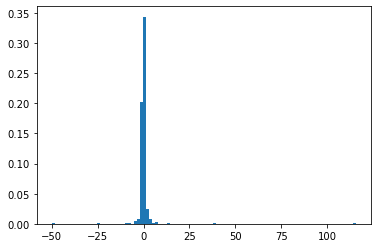

In [4]:
# a. h(x)= x, g(x)=N(0,1)
# the importance sampler=h(x)*(f(x)/g(x))
N2 = 500

def f(x):
    y1 = cauchy.pdf(x,0,1)
    return y1

def g(x):
    y2 = norm.pdf(x,0,1)
    return y2

x2r = np.random.normal(0,1,size=N2) 
# h(x)=x2r 
# the importance sampler:
x2a = x2r * f(x2r)/g(x2r)

plt.hist(x2a,bins=100,density=True)
plt.show()

b. Generate random samples from the Canchy dist.
using MCMC Metropolis sampler
$f(\theta)=\frac{1}{\pi\left(1+\theta^{2}\right)}$

step 1: genarate $\theta^{*}$ from $U(-1,1)$

Step 2: Calculate the acceptance probability, $\alpha=min \left(1, \frac{p\left(\theta^{*}\right)}{P\left(\theta^{(t-1)}\right)}\right)$

step 3: Generate a $u$ from a Uniform $(0,1)$ distribution.

step 4: Iterate until t=T (500)

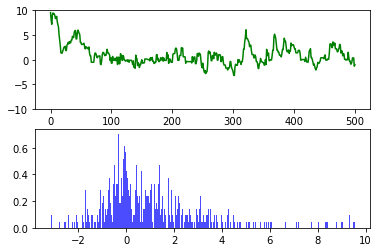

In [5]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 1
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
 
t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
    else:
        theta[t] = theta[t - 1]
 
#print (theta)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212) 
plt.sca(ax1)
plt.ylim(thetamin, thetamax)
plt.plot(range(T+1), theta, 'g-')
plt.sca(ax2)
num_bins = 300
plt.hist(theta, num_bins,density=True, facecolor='blue', alpha=0.7)
plt.show()

c. using the $\mathrm{M}-\mathrm{H}$ sampler

In this problem the P(x) is symmetrical so the result of M-H sampler is the same with the Metropolis sampler


(b) Estimate the probability density function using any density estimation technique based on the above samples from each method.

Importance Sampling method:

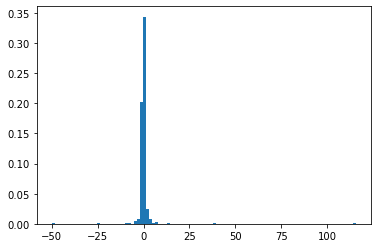

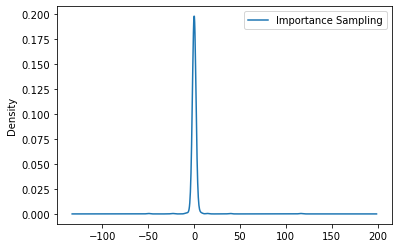

In [6]:
plt.hist(x2a,bins=100,density=True)
plt.show()
p1 = pd.DataFrame(x2a,columns=['Importance Sampling'])
ax = p1.plot.kde()

Metropolis method

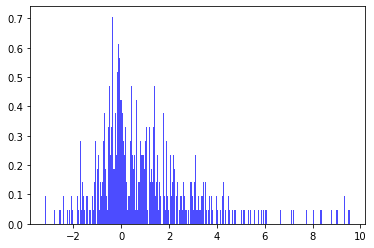

In [7]:
num_bins = 300
plt.hist(theta, num_bins,density=True, facecolor='blue', alpha=0.7)
plt.show()

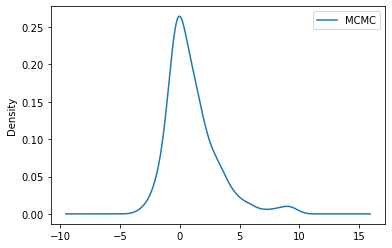

In [8]:
p2 = pd.DataFrame(theta,columns=['MCMC'])
ax = p2.plot.kde()

(c) Show the sequence of samples of each chain.

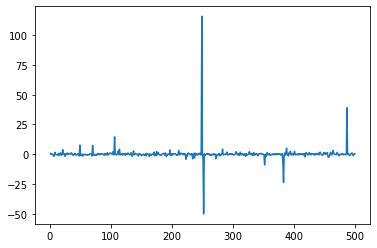

In [9]:
#  sequence of samples of importance sampling
x = np.linspace(1, N2,N2) 
y = x2a
plt.plot(x, y)

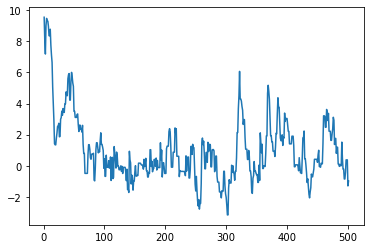

In [10]:
#  sequence of samples of MCMC
x = np.linspace(1, T+1, T+1) 
y = theta
plt.plot(x,y)

3. Some additional questions for Problem #2.

(a) Currently, in Problem #2 above, we take all states from the chain as samples to approximate the target distribution. Therefore, it also includes samples while the chain is still “burning in”. Why is this not a good idea? Can you modify the code such that the effect of burn-in is removed?



A: No, we can not remove the burn in section.
In Markove Chain, there is a process before the system reach the steady state,accordingly in  the method of MCMC, the sampler is keep on jumping before arriving to the target distritbution area,the process is called "burn in".

(b) Explore the effect of different starting conditions. 
For example, what happens when we start the chain with θ = −30?

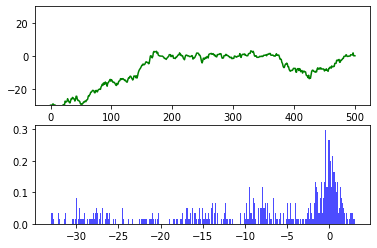

In [11]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 1
theta = [0.0] * (T+1)
thetamin = -30
thetamax = 30


# let theta start from -30
theta[0] = -30
 
t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
    else:
        theta[t] = theta[t - 1]
 
#print (theta)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212) 
plt.sca(ax1)
plt.ylim(thetamin, thetamax)
plt.plot(range(T+1), theta, 'g-')
plt.sca(ax2)
num_bins = 300
plt.hist(theta, num_bins,density=True, facecolor='blue', alpha=0.7)
plt.show()



(c) Calculate the proportion of samples that is accepted on average. Explore the effect of parameter σ on the average acceptance rate.

let σ=1

In [12]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 1
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=1,
 the average acceptance rate  is 0.76


let σ=4

In [13]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 4
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=4,
 the average acceptance rate  is 0.508


let σ=8

In [14]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 8
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=8,
 the average acceptance rate  is 0.306


let σ=10

In [15]:
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 10
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=10,
 the average acceptance rate  is 0.264


 ##### So when  σ > 1, we rise the sigma value we can see the average acceptance rate decreases.

 ##### Now consider 0< σ < 1:

In [16]:
# let σ < 1,say σ=0.5

T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 0.5
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=0.5,
 the average acceptance rate  is 0.88


In [17]:
# let  σ=0.3
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 0.3
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=0.3,
 the average acceptance rate  is 0.942


In [18]:
# let  σ=0.1
T = N2
def cauchy(theta):#sampling from cauchy dist.
    y3 = 1.0 / (1.0 + theta ** 2)
    return y3
 
sigma = 0.1
thetamin = -10
thetamax = 10
theta = [0.0] * (T+1)
theta[0] = np.random.uniform(thetamin, thetamax)
samplecount = 0

t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = np.random.uniform(0, 1)
    if u <= alpha:
        theta[t] = theta_star[0]
        samplecount += 1
    else:
        theta[t] = theta[t - 1]

accrate = samplecount/T
print(f'When σ={sigma},\n the average acceptance rate  is {accrate}')

When σ=0.1,
 the average acceptance rate  is 0.994


 ##### We can find that when  σ < 1, the smaller the σ is, the average acceptance rate is going higher.